In [131]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [132]:
df = pd.read_csv("/Users/zhangyunan/Desktop/sampled_data1 with 700000 rows.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-5404588,Source1,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
2,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [133]:
df1 = df[df['State'].isin(['PA', 'NY', 'NJ'])]

In [134]:
def process_time_value(time_str):
    try:
        # Try to parse as datetime
        dt = pd.to_datetime(time_str, errors='raise')
        return dt.hour, dt.day_name(), dt.month
    except:
        # Handle time-only values
        try:
            # Extract hours from time-only format
            hour = int(time_str.split(':')[0])
            if hour >= 24:
                hour = hour % 24  # Normalize hours greater than 24
            # Since we don't have a date, set a default date for extraction
            default_date = '2021-06-01'  # Arbitrary date
            dt = pd.to_datetime(f'{default_date} {time_str}')
            return hour, dt.day_name(), dt.month
        except:
            return np.nan, np.nan, np.nan

# Apply function
df1[['Hour', 'Day_of_Week', 'Month']] = df1['Start_Time'].apply(lambda x: pd.Series(process_time_value(x)))

print(df1)

               ID   Source  Severity                     Start_Time  \
11      A-2964547  Source2         2            2018-03-23 07:43:01   
19      A-6051707  Source1         2            2021-10-09 15:52:04   
25      A-2316959  Source2         3            2019-01-04 13:38:05   
29      A-4590165  Source1         2            2022-10-14 22:27:17   
40      A-6665540  Source1         2            2020-10-29 23:17:48   
...           ...      ...       ...                            ...   
699957  A-3889999  Source1         2  2022-09-22 07:24:35.000000000   
699958  A-7493058  Source1         2            2018-12-31 20:12:03   
699975  A-4481584  Source1         2            2022-04-07 20:15:00   
699979  A-2076629  Source2         3            2019-06-28 12:57:47   
699997  A-4578188  Source1         2            2022-08-31 12:00:00   

                             End_Time  Start_Lat  Start_Lng    End_Lat  \
11                2018-03-23 08:12:36  40.360512 -79.907692        NaN   

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/1508068249.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Hour', 'Day_of_Week', 'Month']] = df1['Start_Time'].apply(lambda x: pd.Series(process_time_value(x)))
/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/1508068249.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Hour', 'Day_of_Week', 'Month']] = df1['Start_Time'].apply(lambda x: pd.Series(process_time_value(x)))
/var/folders/tm/4mmt29_x6ds1fwnsphnp4_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Traffic_Signal'),
  Text(1, 0, 'Crossing'),
  Text(2, 0, 'Junction'),
  Text(3, 0, 'Stop'),
  Text(4, 0, 'Amenity'),
  Text(5, 0, 'Station'),
  Text(6, 0, 'Give_Way'),
  Text(7, 0, 'Railway'),
  Text(8, 0, 'No_Exit'),
  Text(9, 0, 'Traffic_Calming'),
  Text(10, 0, 'Bump'),
  Text(11, 0, 'Roundabout'),
  Text(12, 0, 'Turning_Loop')])

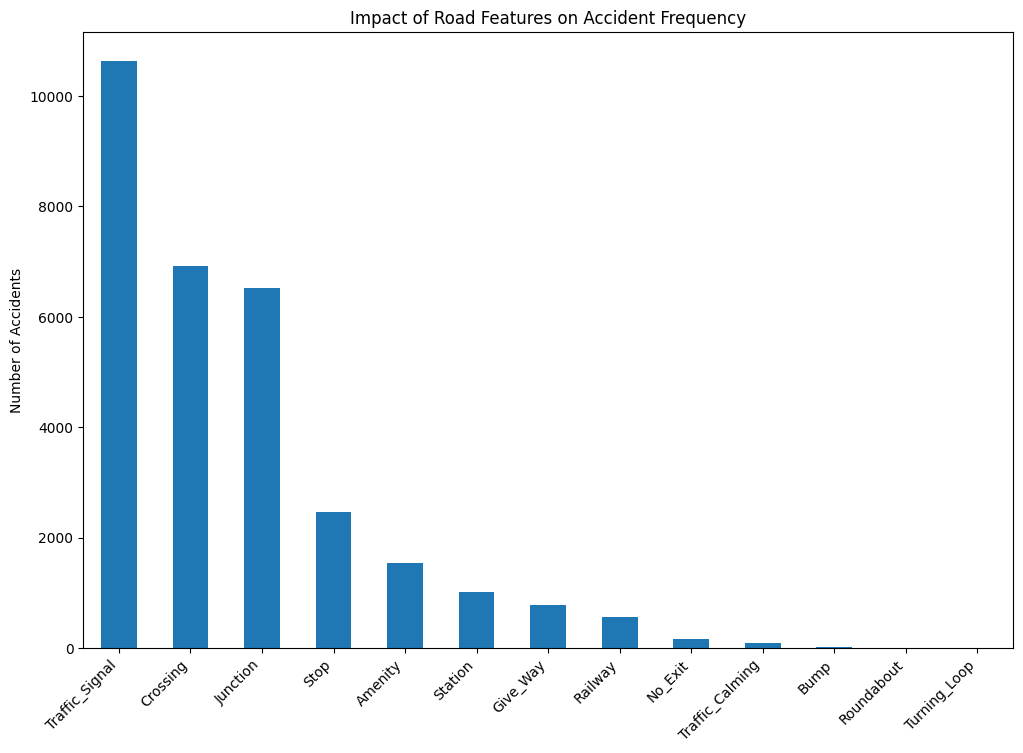

In [135]:
road_type = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
feature_impact = df1[road_type].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_impact.plot(kind='bar')
plt.title('Impact of Road Features on Accident Frequency')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')


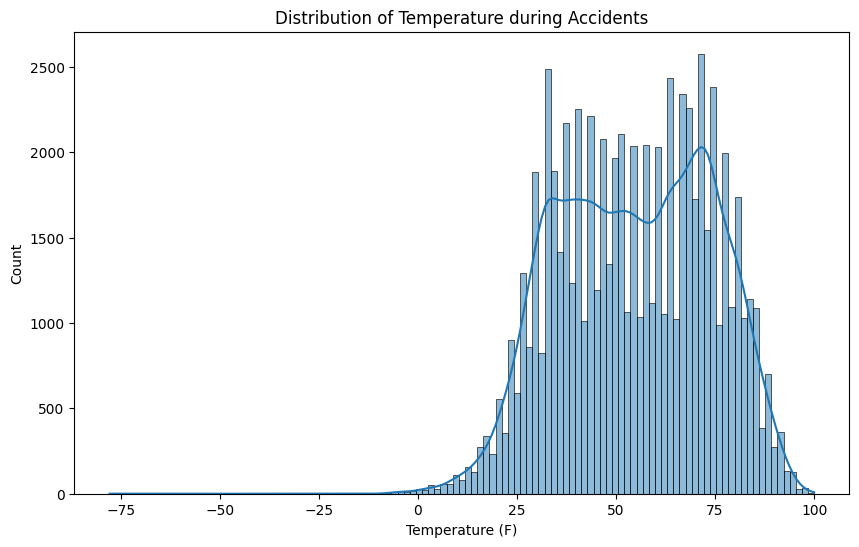

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Temperature(F)'], kde=True)
plt.title('Distribution of Temperature during Accidents')
plt.xlabel('Temperature (F)')
plt.show()

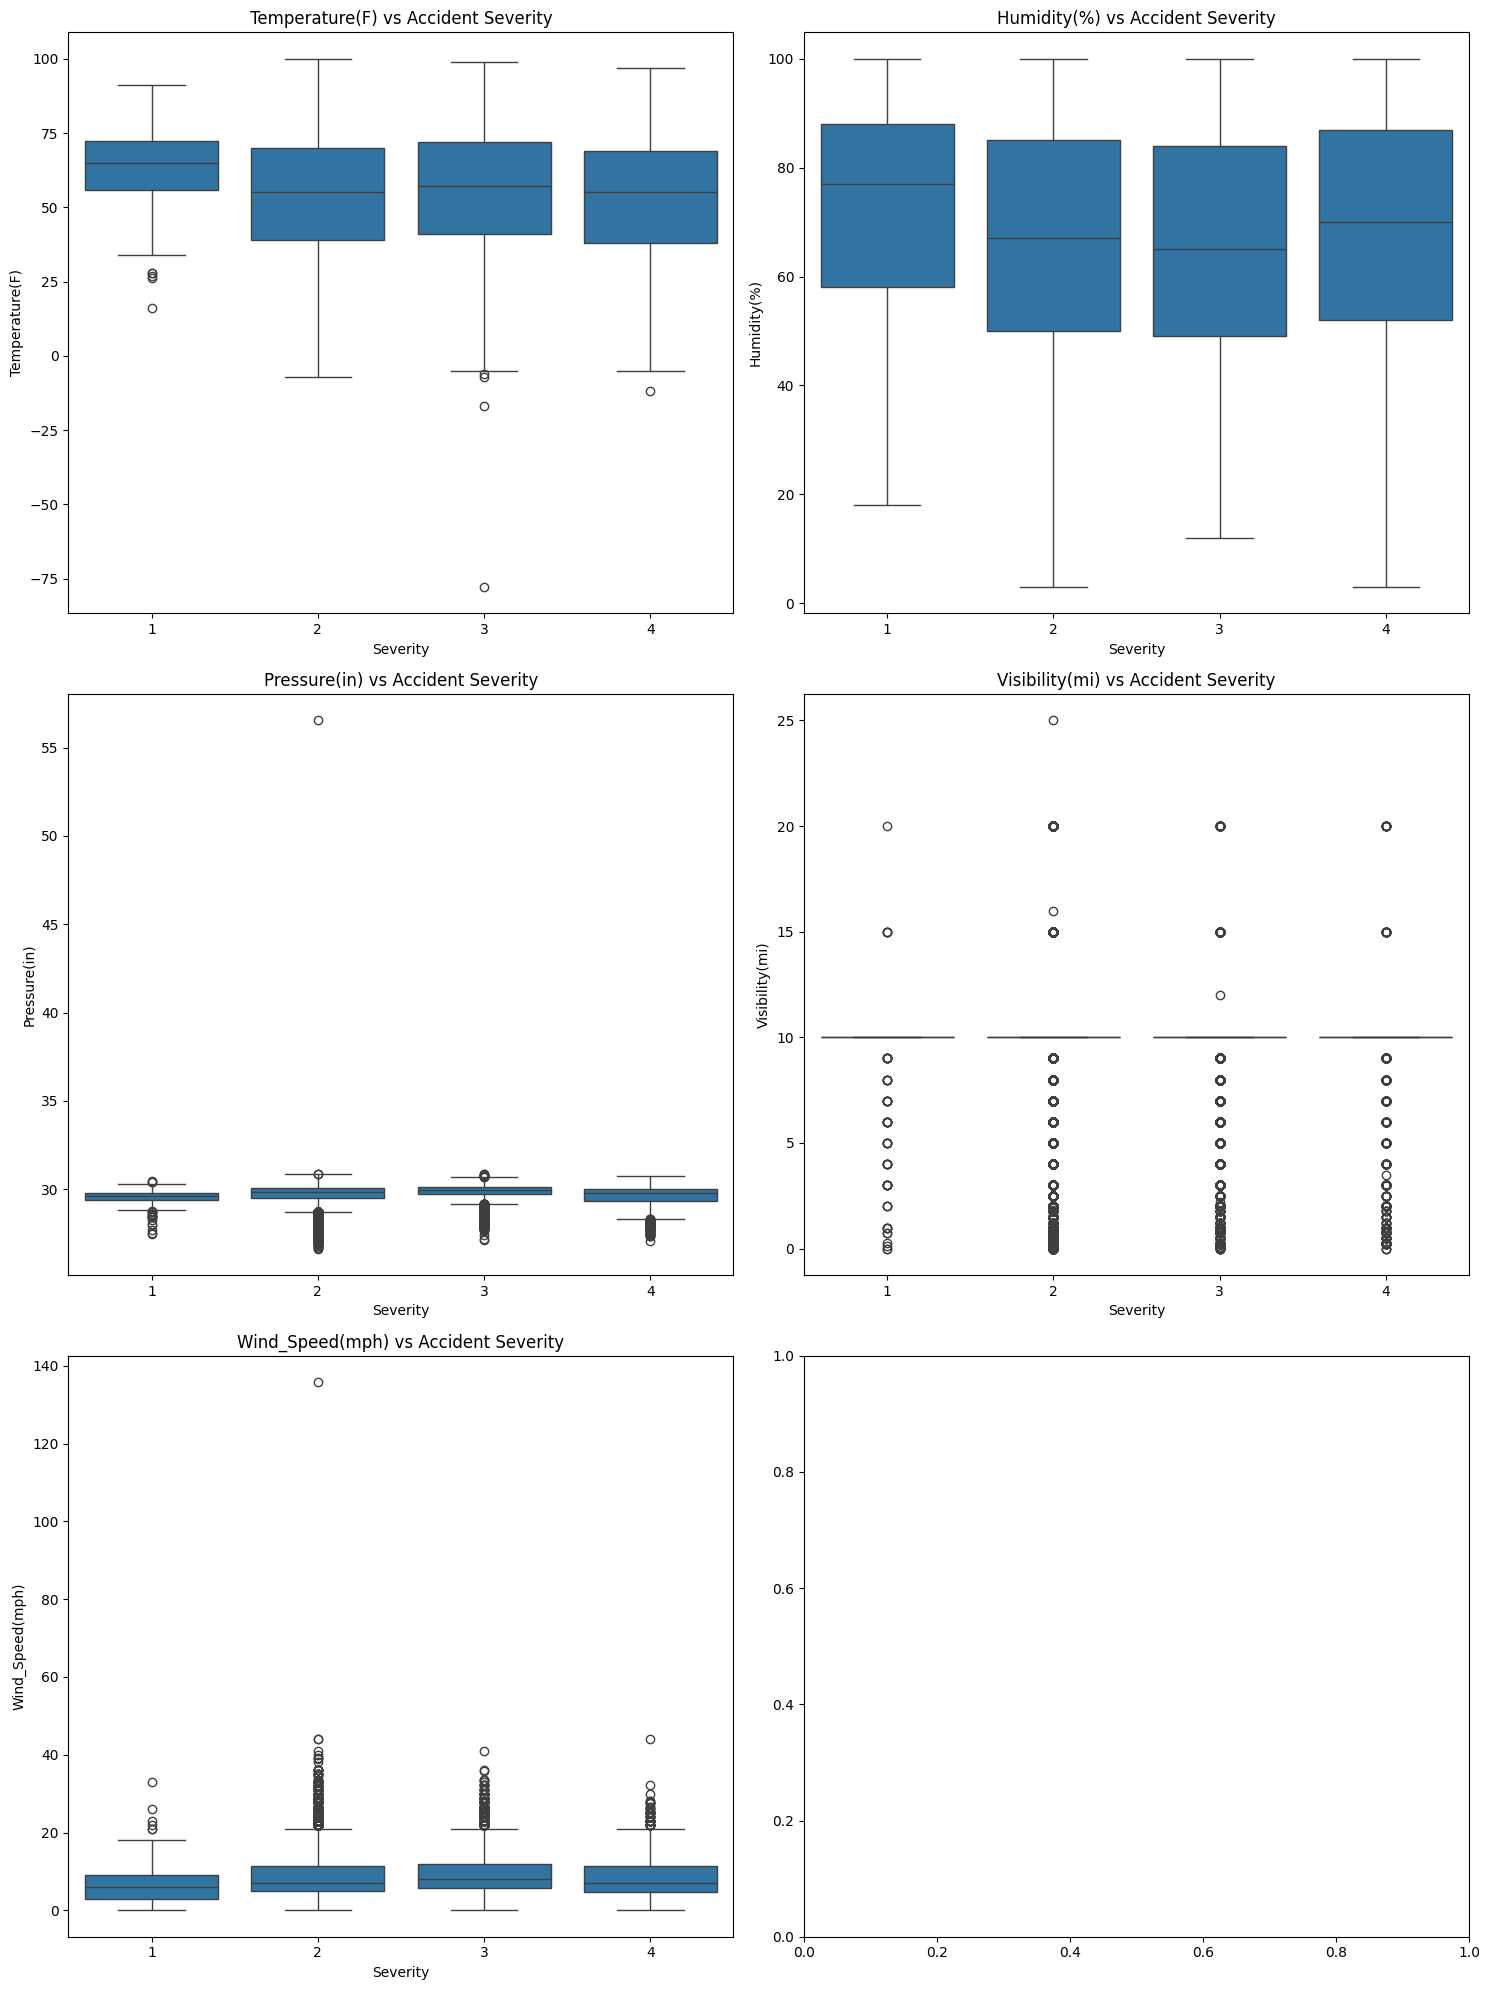

In [137]:
weather_conditions = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()

for i, factor in enumerate(weather_conditions):
    sns.boxplot(x='Severity', y=factor, data=df1, ax=axes[i])
    axes[i].set_title(f'{factor} vs Accident Severity')

plt.tight_layout()
plt.show()

In [138]:
df1.drop(['Wind_Direction','Visibility(mi)','Pressure(in)','Wind_Chill(F)','County','Weather_Timestamp','Zipcode', 'Airport_Code','End_Time','Source','ID','Country', 'Distance(mi)', 'End_Lng','End_Lat','Nautical_Twilight','Astronomical_Twilight','Timezone'], axis=1, inplace=True)

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/2204504127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Wind_Direction','Visibility(mi)','Pressure(in)','Wind_Chill(F)','County','Weather_Timestamp','Zipcode', 'Airport_Code','End_Time','Source','ID','Country', 'Distance(mi)', 'End_Lng','End_Lat','Nautical_Twilight','Astronomical_Twilight','Timezone'], axis=1, inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

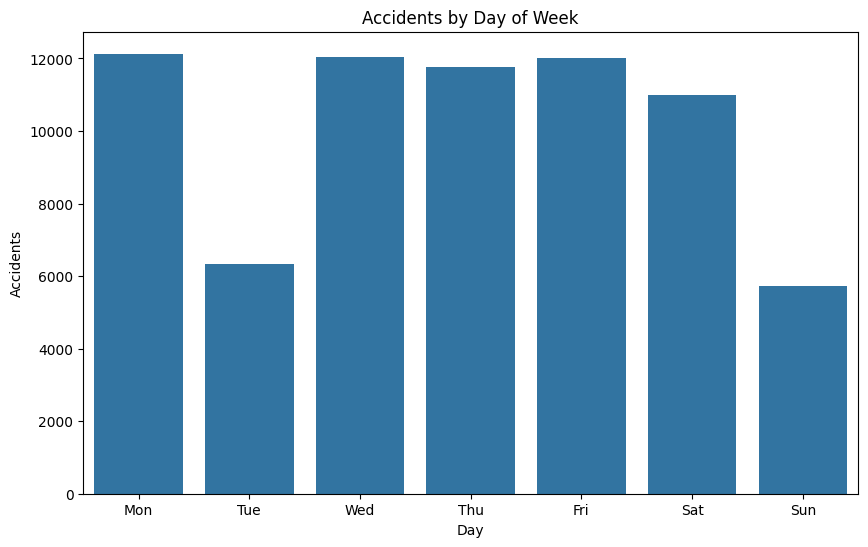

In [139]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df1)
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Accidents')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show

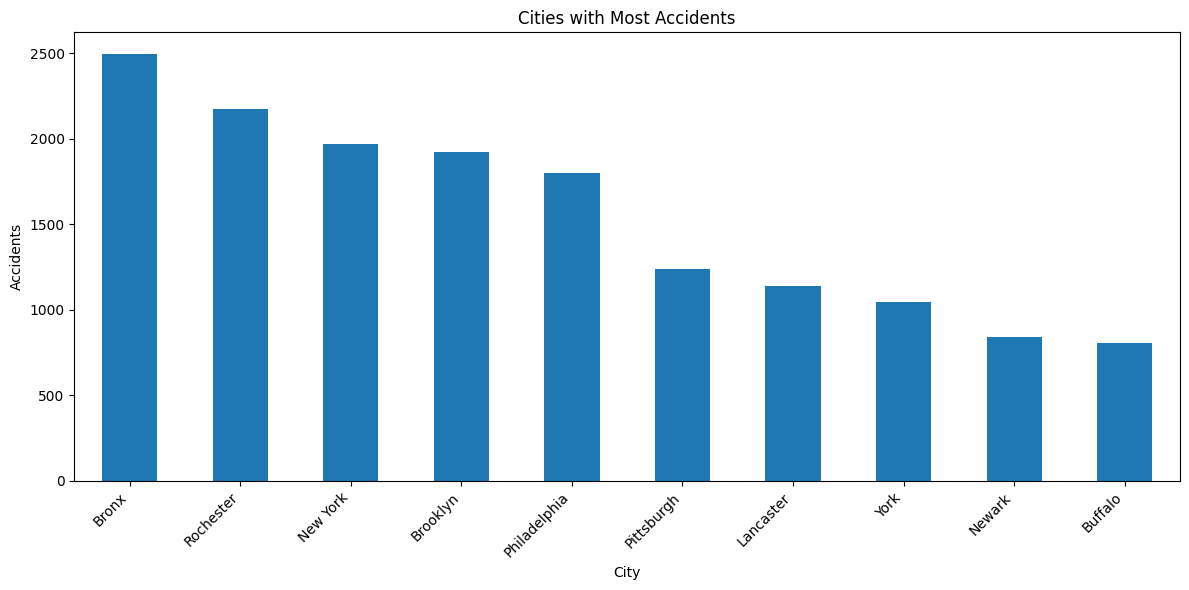

In [140]:
accidents_by_cities = df1['City'].value_counts()
plt.figure(figsize=(12, 6))
accidents_by_cities[:10].plot(kind='bar')
plt.title('Cities with Most Accidents')
plt.xlabel('City')
plt.ylabel('Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [141]:
df1.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Description',
       'Street', 'City', 'State', 'Temperature(F)', 'Humidity(%)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Hour',
       'Day_of_Week', 'Month'],
      dtype='object')

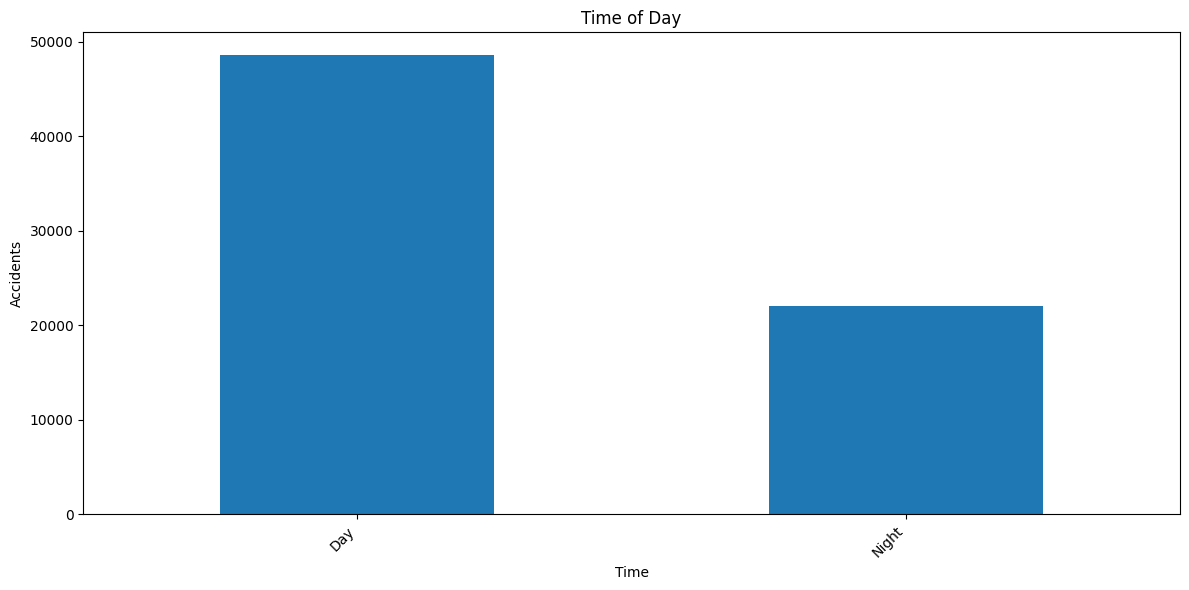

In [142]:
dtnt = df1['Sunrise_Sunset'].value_counts()
plt.figure(figsize=(12, 6))
dtnt.plot(kind='bar')
plt.title('Time of Day')
plt.xlabel('Time')
plt.ylabel('Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [143]:
df1['State'].value_counts()

State
NY    31264
PA    27061
NJ    12654
Name: count, dtype: int64

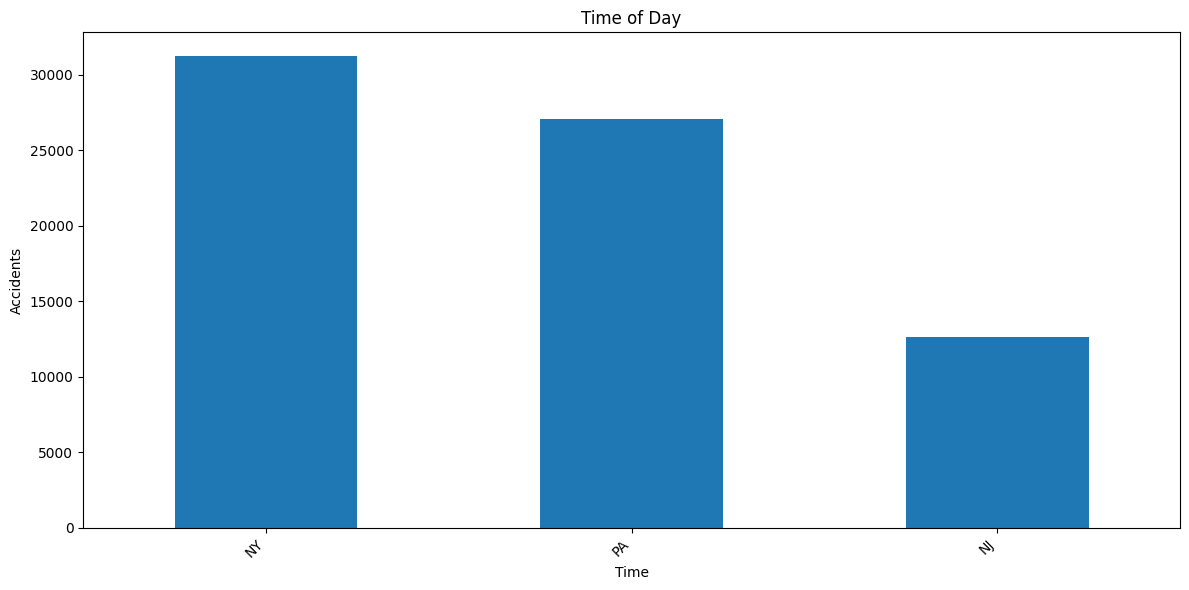

In [144]:
dtnt = df1['State'].value_counts()
plt.figure(figsize=(12, 6))
dtnt.plot(kind='bar')
plt.title('Time of Day')
plt.xlabel('Time')
plt.ylabel('Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [145]:
print(df1.isnull().sum())

Severity                 0
Start_Time               0
Start_Lat                0
Start_Lng                0
Description              1
Street                 145
City                     1
State                    0
Temperature(F)         950
Humidity(%)           1076
Wind_Speed(mph)       4712
Precipitation(in)    17264
Weather_Condition     1102
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset         345
Civil_Twilight         345
Hour                     0
Day_of_Week              0
Month                    0
dtype: int64


In [146]:
categorical_cols = df1.select_dtypes(include=['object'])
categorical_cols.nunique()

Start_Time           69015
Description          60638
Street               13844
City                  2263
State                    3
Weather_Condition       74
Sunrise_Sunset           2
Civil_Twilight           2
Day_of_Week              7
dtype: int64

In [147]:
weather_bins = {
   'Clear': ['Clear', 'Fair'],
    'overcast': ['Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds'],
    'Rain': ['Light Rain', 'Rain', 'Light Freezing Drizzle', 'Light Drizzle', 'Heavy Rain', 'Light Freezing Rain', 'Drizzle', 'Light Freezing Fog', 'Light Rain Showers', 'Showers in the Vicinity', 'T-Storm', 'Thunder', 'Patches of Fog', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Snow', 'Rain / Windy', 'Heavy Rain / Windy', 'Squalls', 'Heavy Ice Pellets', 'Thunder / Windy', 'Drizzle and Fog', 'T-Storm / Windy', 'Smoke / Windy', 'Haze / Windy', 'Light Drizzle / Windy', 'Widespread Dust / Windy', 'Wintry Mix', 'Wintry Mix / Windy', 'Light Snow with Thunder', 'Fog / Windy', 'Snow and Thunder', 'Sleet / Windy', 'Heavy Freezing Rain / Windy', 'Squalls / Windy', 'Light Rain Shower / Windy', 'Snow and Thunder / Windy', 'Light Sleet / Windy', 'Sand / Dust Whirlwinds', 'Mist / Windy', 'Drizzle / Windy', 'Duststorm', 'Sand / Dust Whirls Nearby', 'Thunder and Hail', 'Freezing Rain / Windy', 'Light Snow Shower / Windy', 'Partial Fog', 'Thunder / Wintry Mix / Windy', 'Patches of Fog / Windy', 'Rain and Sleet', 'Light Snow Grains', 'Partial Fog / Windy', 'Sand / Dust Whirlwinds / Windy', 'Heavy Snow with Thunder', 'Heavy Blowing Snow', 'Low Drifting Snow', 'Light Hail', 'Light Thunderstorm', 'Heavy Freezing Drizzle', 'Light Blowing Snow', 'Thunderstorms and Snow', 'Heavy Rain Showers', 'Rain Shower / Windy', 'Sleet and Thunder', 'Heavy Sleet and Thunder', 'Drifting Snow / Windy', 'Shallow Fog / Windy', 'Thunder and Hail / Windy', 'Heavy Sleet / Windy', 'Sand / Windy', 'Heavy Rain Shower / Windy', 'Blowing Snow Nearby', 'Blowing Sand', 'Heavy Rain Shower', 'Drifting Snow', 'Heavy Thunderstorms with Small Hail'],
    'Snow': ['Light Snow', 'Snow', 'Light Snow / Windy', 'Snow Grains', 'Snow Showers', 'Snow / Windy', 'Light Snow and Sleet', 'Snow and Sleet', 'Light Snow and Sleet / Windy', 'Snow and Sleet / Windy'],
    'Wind': ['Blowing Dust / Windy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'T-Storm / Windy', 'Blowing Snow / Windy', 'Freezing Rain / Windy', 'Light Snow and Sleet / Windy', 'Sleet and Thunder / Windy', 'Blowing Snow Nearby', 'Heavy Rain Shower / Windy']
}

def map_weather_to_bins(weather):
    for bin_name, bin_values in weather_bins.items():
        if weather in bin_values:
            return bin_name
    return 'Other' 

df1 ['Weather_Bin'] = df1['Weather_Condition'].apply(map_weather_to_bins)
df1 ['Weather_Bin']

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/3679739167.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1 ['Weather_Bin'] = df1['Weather_Condition'].apply(map_weather_to_bins)


11           Clear
19        overcast
25           Clear
29           Clear
40        overcast
            ...   
699957        Rain
699958        Rain
699975        Wind
699979       Clear
699997       Clear
Name: Weather_Bin, Length: 70979, dtype: object

In [148]:
df1.drop(columns=['Weather_Condition'], inplace=True)

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/2287667592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Weather_Condition'], inplace=True)


In [149]:
df1.drop(columns=['Start_Lat','Start_Lng'], axis=1, inplace=True)

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/983909986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Start_Lat','Start_Lng'], axis=1, inplace=True)


In [150]:
df1.columns

Index(['Severity', 'Start_Time', 'Description', 'Street', 'City', 'State',
       'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight',
       'Hour', 'Day_of_Week', 'Month', 'Weather_Bin'],
      dtype='object')

In [151]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df1.select_dtypes(include=['object','bool','category']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])
    
X = df1.drop('Severity', axis=1)
y= df1['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/4214119187.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label_encoder.fit_transform(df1[col])
/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/4214119187.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label_encoder.fit_transform(df1[col])
/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/4214119187.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Accuracy: 0.89
Confusion Matrix:
[[   10    76     1     0]
 [    1 16658   267    26]
 [    0  1427  1904     1]
 [    0   521    36   366]]
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.11      0.20        87
           2       0.89      0.98      0.93     16952
           3       0.86      0.57      0.69      3332
           4       0.93      0.40      0.56       923

    accuracy                           0.89     21294
   macro avg       0.90      0.52      0.60     21294
weighted avg       0.89      0.89      0.88     21294



In [152]:
def is_rush_hour(hour, day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 6 <= hour <= 9 or 16 <= hour <= 19
    else:
        return False

df1['Rush Hour'] = df1.apply(lambda row: is_rush_hour(row['Hour'], row['Day_of_Week']), axis=1)

df1.head()

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/3479156485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rush Hour'] = df1.apply(lambda row: is_rush_hour(row['Hour'], row['Day_of_Week']), axis=1)


,Severity,Start_Time,Description,Street,City,State,Temperature(F),Humidity(%),Wind_Speed(mph),Precipitation(in),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Hour,Day_of_Week,Month,Weather_Bin,Rush Hour
11,2,13087,45666,6925,2154,2,26.1,63.0,3.5,NaN,...,0,1,0,0,0,7,0,3,0,False
19,2,44282,43381,2496,2024,1,67.0,54.0,9.0,0.0,...,0,0,0,0,0,15,2,10,5,False
25,3,18398,33621,11850,1590,2,39.0,82.0,NaN,NaN,...,0,1,0,0,0,13,0,1,0,False
29,2,63607,44988,9097,1430,1,59.0,58.0,3.0,0.0,...,0,0,0,1,1,22,0,10,0,False
40,2,31573,56036,8978,241,1,41.0,89.0,13.0,0.0,...,0,0,0,1,1,23,4,10,5,False


In [153]:
categorical_cols = df1.select_dtypes(include=['object','bool','category']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/203112651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label_encoder.fit_transform(df1[col])


In [154]:
df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  308436
End_Lng                  308436
Distance(mi)                  0
Description                   1
Street                      992
City                         25
County                        0
State                         0
Zipcode                     162
Country                       0
Timezone                    694
Airport_Code               2030
Weather_Timestamp         10894
Temperature(F)            14849
Wind_Chill(F)            181187
Humidity(%)               15771
Pressure(in)              12767
Visibility(mi)            16042
Wind_Direction            15961
Wind_Speed(mph)           52154
Precipitation(in)        199819
Weather_Condition         15717
Amenity                       0
Bump                          0
Crossing

In [155]:
df1.drop(['Humidity(%)'],axis=1,inplace=True)

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/351756056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Humidity(%)'],axis=1,inplace=True)


In [156]:
df1.columns

Index(['Severity', 'Start_Time', 'Description', 'Street', 'City', 'State',
       'Temperature(F)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Hour',
       'Day_of_Week', 'Month', 'Weather_Bin', 'Rush Hour'],
      dtype='object')

In [157]:
df1.fillna(method='ffill', limit=5, inplace=True)
df1.fillna(method='bfill', limit=5, inplace=True)

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/384032973.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill', limit=5, inplace=True)
/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/384032973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(method='ffill', limit=5, inplace=True)
/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/384032973.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='bfill', limit=5, inplace=True)
/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/384032973.py:2: SettingWithCopyWa

In [158]:
X = df1.drop(['Severity', 'Description'], axis=1)
y = df1['Severity']

# Select only numerical columns
Xnum = X.select_dtypes(include=['int64', 'float64'])

# Print the initial state of Xnum
print("Initial Xnum:")
print(Xnum.head())

# Check for and handle missing or infinite values
Xnum = Xnum.replace([np.inf, -np.inf], np.nan)

# Print state after replacing infinities
print("After replacing infinities:")
print(Xnum.head())

# Drop rows with any NaN values
Xnum = Xnum.dropna()

# Print state after dropping NaNs
print("After dropping NaNs:")
print(Xnum.head())

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()

# Calculate VIF for each numerical feature
vif_data["Feature"] = Xnum.columns
vif_data["VIF"] = [variance_inflation_factor(Xnum.values, i) for i in range(Xnum.shape[1])]

# Sort VIF values in descending order
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Display the VIF values
print(vif_data)

Initial Xnum:
    Start_Time  Street  City  State  Temperature(F)  Wind_Speed(mph)  \
11       13087    6925  2154      2            26.1              3.5   
19       44282    2496  2024      1            67.0              9.0   
25       18398   11850  1590      2            39.0              9.0   
29       63607    9097  1430      1            59.0              3.0   
40       31573    8978   241      1            41.0             13.0   

    Precipitation(in)  Amenity  Bump  Crossing  ...  Traffic_Calming  \
11                0.0        0     0         0  ...                0   
19                0.0        0     0         0  ...                0   
25                0.0        0     0         1  ...                0   
29                0.0        0     0         0  ...                0   
40                0.0        0     0         0  ...                0   

    Traffic_Signal  Turning_Loop  Sunrise_Sunset  Civil_Twilight  Hour  \
11               1             0              

/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


              Feature       VIF
4      Temperature(F)  9.326090
20     Sunrise_Sunset  7.552058
21     Civil_Twilight  7.044817
1              Street  6.173947
22               Hour  5.760824
24              Month  4.694934
0          Start_Time  3.868986
2                City  3.558969
3               State  3.519709
5     Wind_Speed(mph)  3.227263
23        Day_of_Week  2.921170
25        Weather_Bin  2.179413
18     Traffic_Signal  1.556693
9            Crossing  1.486638
17    Traffic_Calming  1.359263
8                Bump  1.346284
15            Station  1.153685
11           Junction  1.132784
13            Railway  1.111330
7             Amenity  1.110105
16               Stop  1.078110
10           Give_Way  1.019786
6   Precipitation(in)  1.007190
12            No_Exit  1.003621
14         Roundabout  1.000377
19       Turning_Loop       NaN
26          Rush Hour       NaN


In [159]:
#VIF
X = df1.drop(['Severity', 'Description'], axis=1)
y= df1['Severity']
vif_data = pd.DataFrame()
Xnum = X.select_dtypes(include=['int64','float64'])
vif_data["Severity"] = Xnum.columns
vif_data["VIF"] = [variance_inflation_factor(Xnum.values, i) for i in range(Xnum.shape[1])]
vif_data.sort_values(by='VIF',ascending= False)

/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Severity,VIF
4,Temperature(F),9.326090
20,Sunrise_Sunset,7.552058
21,Civil_Twilight,7.044817
1,Street,6.173947
22,Hour,5.760824
24,Month,4.694934
0,Start_Time,3.868986
2,City,3.558969
3,State,3.519709
5,Wind_Speed(mph),3.227263


In [160]:
#Test again
vif_data = pd.DataFrame()
Xnum = X.select_dtypes(include=['int64','float64'])
vif_data["Severity"] = Xnum.columns
vif_data["VIF"] = [variance_inflation_factor(Xnum.values, i) for i in range(Xnum.shape[1])]
vif_data.sort_values(by='VIF',ascending= False)

/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Severity,VIF
4,Temperature(F),9.326090
20,Sunrise_Sunset,7.552058
21,Civil_Twilight,7.044817
1,Street,6.173947
22,Hour,5.760824
24,Month,4.694934
0,Start_Time,3.868986
2,City,3.558969
3,State,3.519709
5,Wind_Speed(mph),3.227263


In [161]:
bestfeatures = SelectKBest(score_func= chi2, k=10)
Xnum = X.select_dtypes(include=['int64','float64'])

fit = bestfeatures.fit(abs(Xnum),y)

dfscore= pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(Xnum.columns)

scores= pd.concat([dfcol,dfscore],axis=1)
scores.columns=['Features','Score']
featureScores= scores.sort_values(by='Score')
scores

,Features,Score
0,Start_Time,7.598652e+07
1,Street,2.691276e+06
2,City,5.366268e+04
3,State,1.975589e+02
4,Temperature(F),9.200950e+02
5,Wind_Speed(mph),1.003727e+03
6,Precipitation(in),5.583269e+01
7,Amenity,5.363308e+01
8,Bump,1.019720e+01
9,Crossing,6.999476e+01


In [162]:
df1.drop(['Start_Time'],axis=1,inplace=True)

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/3427931787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Start_Time'],axis=1,inplace=True)


In [163]:

# Identify the boolean columns
boolean_cols = df1.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers (0 and 1)
df1[boolean_cols] = df1[boolean_cols].astype(int)

# Display the updated DataFrame
print(df1.head())

    Severity  Description  Street  City  State  Temperature(F)  \
11         2        45666    6925  2154      2            26.1   
19         2        43381    2496  2024      1            67.0   
25         3        33621   11850  1590      2            39.0   
29         2        44988    9097  1430      1            59.0   
40         2        56036    8978   241      1            41.0   

    Wind_Speed(mph)  Precipitation(in)  Amenity  Bump  ...  Traffic_Calming  \
11              3.5                0.0        0     0  ...                0   
19              9.0                0.0        0     0  ...                0   
25              9.0                0.0        0     0  ...                0   
29              3.0                0.0        0     0  ...                0   
40             13.0                0.0        0     0  ...                0   

    Traffic_Signal  Turning_Loop  Sunrise_Sunset  Civil_Twilight  Hour  \
11               1             0               0      

In [164]:
X = df1.drop(['Severity', 'Description'], axis=1)
y= df1['Severity']
Xnum = X.select_dtypes(include=['int64','float64'])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(Xnum, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)  

rf_classifier.feature_importances_

array([1.89553581e-01, 1.43243852e-01, 2.46821536e-02, 1.39398586e-01,
       1.15903303e-01, 2.59804630e-02, 3.35096379e-03, 1.04274651e-04,
       7.97769120e-03, 2.71068560e-03, 1.43440147e-02, 1.11289793e-03,
       1.86172913e-03, 2.19807869e-06, 2.23683189e-03, 5.06760876e-03,
       8.97954706e-04, 9.55787745e-03, 0.00000000e+00, 1.20532848e-02,
       1.08896249e-02, 1.03783536e-01, 7.17204416e-02, 7.42594380e-02,
       3.93070073e-02, 0.00000000e+00])

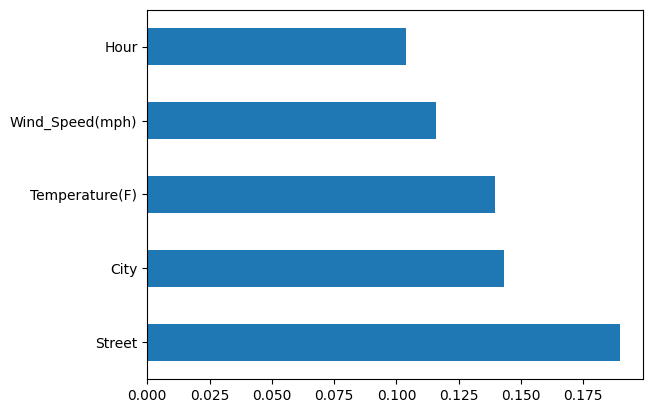

In [166]:
ft_imp = pd.Series(rf_classifier.feature_importances_, index= Xnum.columns)
ft_imp.nlargest(5).plot(kind='barh')
plt.show()

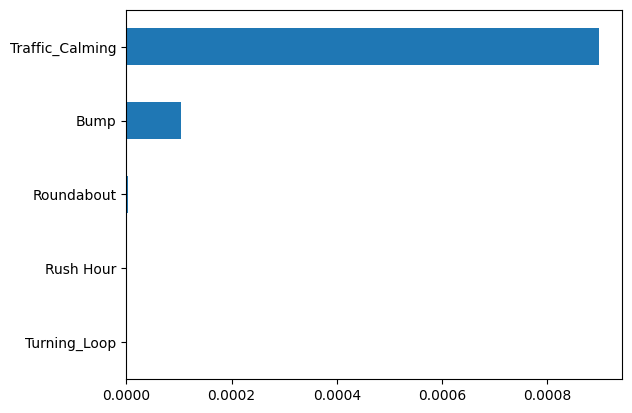

In [167]:
ft_imp = pd.Series(rf_classifier.feature_importances_, index= Xnum.columns)
ft_imp.nsmallest(5).plot(kind='barh')
plt.show()

In [168]:
df1.drop(['Traffic_Calming','Bump','Roundabout','Rush Hour','Turning_Loop'],axis=1,inplace=True)

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_79765/1582270015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Traffic_Calming','Bump','Roundabout','Rush Hour','Turning_Loop'],axis=1,inplace=True)


### RandomForest

In [169]:
X = df1.drop('Severity', axis=1)
y= df1['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# print(classification_task(rf_classifier,X_train, y_train ,X_test,y_test, y_pred,'rf'))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.87
Confusion Matrix:
[[    1    84     2     0]
 [    1 16716   209    26]
 [    1  1727  1602     2]
 [    0   664    13   246]]
Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.01      0.02        87
           2       0.87      0.99      0.92     16952
           3       0.88      0.48      0.62      3332
           4       0.90      0.27      0.41       923

    accuracy                           0.87     21294
   macro avg       0.74      0.44      0.49     21294
weighted avg       0.87      0.87      0.85     21294



### classification task

In [196]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [197]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [198]:
y_pred = rf_classifier.predict(X_test)
Eval_Rf= classification_task(rf_classifier,X_train, y_train ,X_test ,y_test, y_pred ,'Random Forest')
Eval_Rf

,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest,0.876068,0.87627,0.876068,0.857002,0.876068


In [199]:
cr= classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.02        87
           2       0.87      0.99      0.93     16952
           3       0.89      0.50      0.64      3332
           4       0.90      0.28      0.43       923

    accuracy                           0.88     21294
   macro avg       0.79      0.44      0.50     21294
weighted avg       0.88      0.88      0.86     21294



### Gaussian Naive Bayes (GaussianNB) Classifier:

In [200]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [201]:
nb= classification_report(y_test, y_pred)
print("Classification Report:")
print(nb)

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.02        87
           2       0.87      0.99      0.93     16952
           3       0.89      0.50      0.64      3332
           4       0.90      0.28      0.43       923

    accuracy                           0.88     21294
   macro avg       0.79      0.44      0.50     21294
weighted avg       0.88      0.88      0.86     21294



In [202]:
y_pred = nb_classifier.predict(X_test)
Eval_nb=classification_task(nb_classifier,X_train, y_train ,X_test,y_test, y_pred,'Naive Bayes')
Eval_nb

/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Naive Bayes,0.79506,0.680672,0.79506,0.705735,0.79506


### Decision Tree

In [170]:
# random_state=0 to have splits of features 
# the same the next time running
# make an instance of the model
dfcal_des = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0
) 


In [171]:
dfcal_des.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

[Text(0.5852272727272727, 0.9285714285714286, 'Description <= 51272.5\ngini = 0.338\nsamples = 49685\nvalue = [179.0, 39611.0, 7776.0, 2119.0]\nclass = 2'),
 Text(0.34232954545454547, 0.7857142857142857, 'Description <= 33494.5\ngini = 0.378\nsamples = 41269\nvalue = [178, 31629, 7360, 2102]\nclass = 2'),
 Text(0.46377840909090906, 0.8571428571428572, 'True  '),
 Text(0.18181818181818182, 0.6428571428571429, 'Description <= 5704.5\ngini = 0.305\nsamples = 27740\nvalue = [153, 22873, 2995, 1719]\nclass = 2'),
 Text(0.09090909090909091, 0.5, 'Description <= 3731.5\ngini = 0.442\nsamples = 4559\nvalue = [2, 3065, 1487, 5]\nclass = 2'),
 Text(0.045454545454545456, 0.35714285714285715, 'Description <= 163.0\ngini = 0.069\nsamples = 2819\nvalue = [2, 2718, 98, 1]\nclass = 2'),
 Text(0.022727272727272728, 0.21428571428571427, 'Description <= 138.5\ngini = 0.476\nsamples = 117\nvalue = [0, 43, 73, 1]\nclass = 3'),
 Text(0.011363636363636364, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.03409

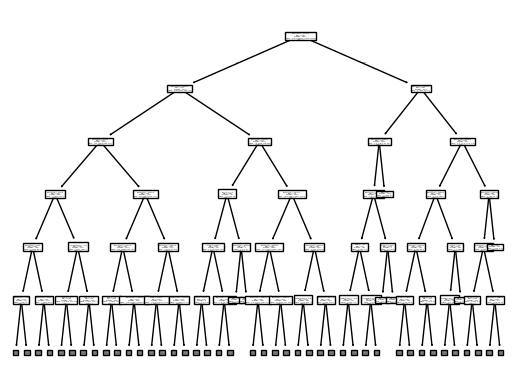

In [172]:
plot_tree(
    dfcal_des, 
    max_depth= 5, 
    feature_names = X_train.columns.tolist(), 
    class_names=['1', '2','3','4']
)

[Text(0.5, 0.875, 'Description <= 51272.5\ngini = 0.338\nsamples = 49685\nvalue = [179.0, 39611.0, 7776.0, 2119.0]\nclass = 2'),
 Text(0.25, 0.625, 'Description <= 33494.5\ngini = 0.378\nsamples = 41269\nvalue = [178, 31629, 7360, 2102]\nclass = 2'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Description <= 5704.5\ngini = 0.305\nsamples = 27740\nvalue = [153, 22873, 2995, 1719]\nclass = 2'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Description <= 34416.0\ngini = 0.476\nsamples = 13529\nvalue = [25, 8756, 4365, 383]\nclass = 2'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Description <= 59496.0\ngini = 0.098\nsamples = 8416\nvalue = [1, 7982, 416, 17]\nclass = 2'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Description <= 51554.0\ngini = 0.001\nsamples = 7539\nvalue = [0.0, 7535.0, 4.0, 0.0]\nclass = 2'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0

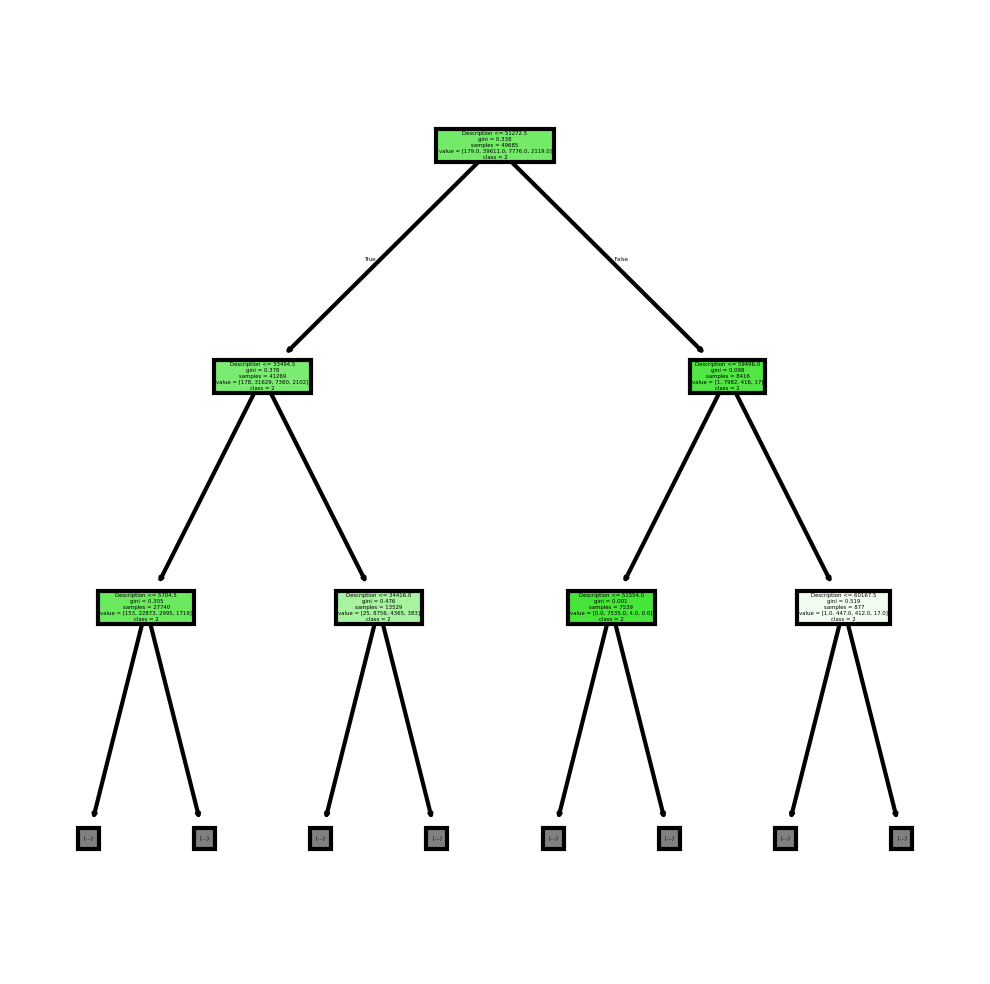

In [173]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (4,4), dpi=300
    )
plot_tree(
    dfcal_des, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['1', '2','3','4'], 
    filled = True
    )

[Text(0.5, 0.875, 'Description <= 51272.5\ngini = 0.338\nsamples = 49685\nvalue = [179.0, 39611.0, 7776.0, 2119.0]\nclass = 2'),
 Text(0.25, 0.625, 'Description <= 33494.5\ngini = 0.378\nsamples = 41269\nvalue = [178, 31629, 7360, 2102]\nclass = 2'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Description <= 5704.5\ngini = 0.305\nsamples = 27740\nvalue = [153, 22873, 2995, 1719]\nclass = 2'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Description <= 34416.0\ngini = 0.476\nsamples = 13529\nvalue = [25, 8756, 4365, 383]\nclass = 2'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Description <= 59496.0\ngini = 0.098\nsamples = 8416\nvalue = [1, 7982, 416, 17]\nclass = 2'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Description <= 51554.0\ngini = 0.001\nsamples = 7539\nvalue = [0.0, 7535.0, 4.0, 0.0]\nclass = 2'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0

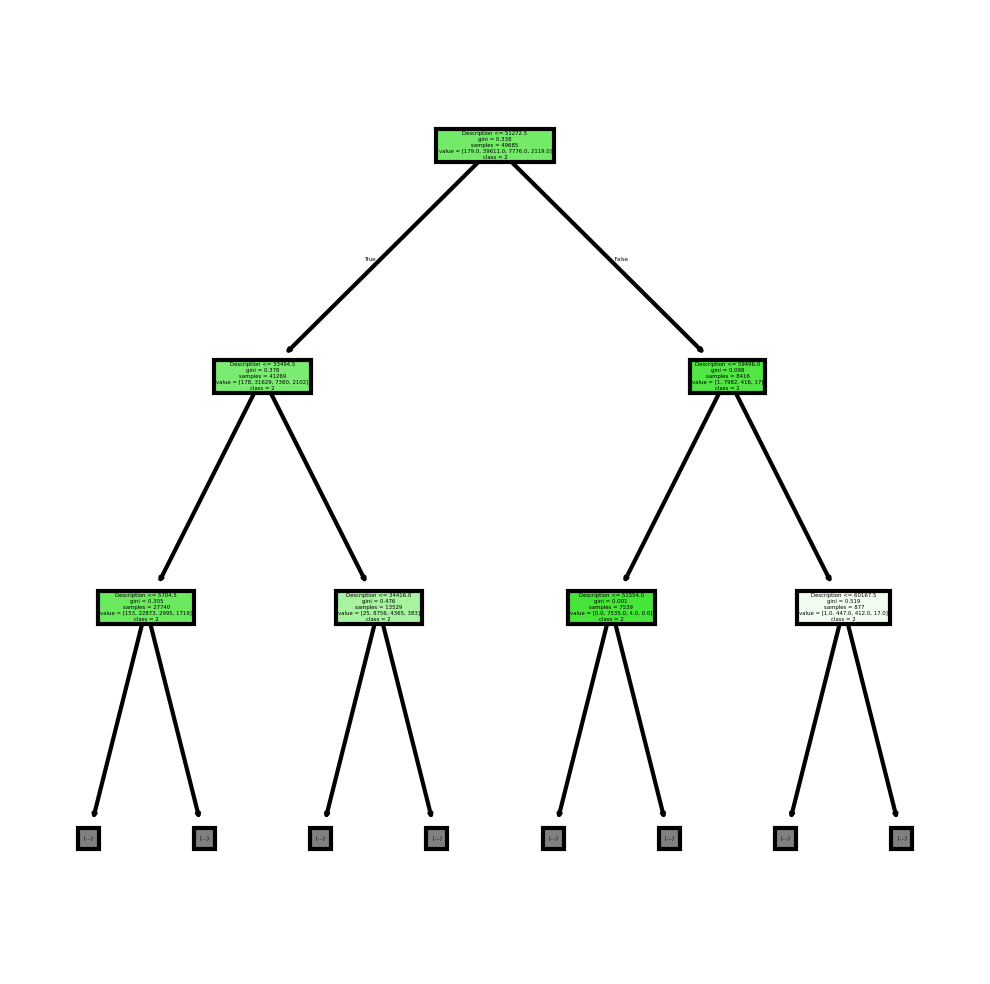

In [174]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (4,4), dpi=300
    )
plot_tree(
    dfcal_des, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['1', '2','3','4'], 
    filled = True
    )

In [175]:
pred = dfcal_des.predict(X_test)
pred[:5]
model = pd.DataFrame(confusion_matrix(y_test, pred), index=['1', '2','3','4'], columns=['1', '2','3','4'])
model.index.name = 'True'
model.columns.name = 'Predicted'
model

Predicted,1,2,3,4
True,,,,
1,0,84,3,0
2,1,16527,399,25
3,0,907,2416,9
4,0,494,16,413


In [176]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        87
           2       0.92      0.97      0.95     16952
           3       0.85      0.73      0.78      3332
           4       0.92      0.45      0.60       923

    accuracy                           0.91     21294
   macro avg       0.67      0.54      0.58     21294
weighted avg       0.90      0.91      0.90     21294



Decision Tree Version 2

In [204]:
# We know our target, Severity, is imbalanced. Now we have to deal with this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
classrep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classrep)

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.29      0.28        87
           2       0.93      0.93      0.93     16952
           3       0.76      0.75      0.75      3332
           4       0.51      0.56      0.53       923

    accuracy                           0.88     21294
   macro avg       0.62      0.63      0.62     21294
weighted avg       0.88      0.88      0.88     21294



### K-Nearest Neighbors (KNN) Classifier

In [177]:
# Initialize the KNN model with k=5
# no more than k=15
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.887010425471964
Confusion Matrix:
[[    4    75     7     1]
 [   19 16139   727    67]
 [    2   983  2345     2]
 [    1   481    41   400]]
Classification Report:
              precision    recall  f1-score   support

           1       0.15      0.05      0.07        87
           2       0.91      0.95      0.93     16952
           3       0.75      0.70      0.73      3332
           4       0.85      0.43      0.57       923

    accuracy                           0.89     21294
   macro avg       0.67      0.53      0.58     21294
weighted avg       0.88      0.89      0.88     21294



### Model Improvement

In [178]:
param_grid = {
    'classifier__n_neighbors':[5,7,9],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['euclidean','manhattan','minkowski']
}

In [179]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=
                    [
                        
                        ('classifier',KNeighborsClassifier())
                    ])

In [180]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*a

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan',
                                                'minkowski'],
                         'classifier__n_neighbors': [5, 7, 9],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [181]:
print(grid_search.best_params_)

{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}


In [182]:
new_classifier = KNeighborsClassifier(n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
                                        metric = grid_search.best_params_['classifier__metric'],
                                        weights = grid_search.best_params_['classifier__weights']
                                        )

In [183]:
new_pipeline = Pipeline(steps=
                          [
                             
                              ('classifier',new_classifier)
                          ])
new_pipeline.fit(X_train,y_train)

Pipeline(steps=[('classifier', KNeighborsClassifier(metric='euclidean'))])

In [184]:
pred = new_pipeline.predict(X_test)

In [185]:
probs = new_pipeline.predict_proba(X_test)

In [186]:
accuracy_score(y_test,pred)

0.887010425471964

In [187]:
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       0.15      0.05      0.07        87
           2       0.91      0.95      0.93     16952
           3       0.75      0.70      0.73      3332
           4       0.85      0.43      0.57       923

    accuracy                           0.89     21294
   macro avg       0.67      0.53      0.58     21294
weighted avg       0.88      0.89      0.88     21294



### Data Standardizing

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Define your pipeline (example)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Example step, adjust as needed
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up GridSearchCV with an appropriate average for F1 score
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Best F1 score:  0.7532578516019217


In [189]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
recall = recall_score(y_test, pred, average='weighted')
precision_score(y_test,pred,average= 'weighted' )
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       0.15      0.05      0.07        87
           2       0.91      0.95      0.93     16952
           3       0.75      0.70      0.73      3332
           4       0.85      0.43      0.57       923

    accuracy                           0.89     21294
   macro avg       0.67      0.53      0.58     21294
weighted avg       0.88      0.89      0.88     21294

